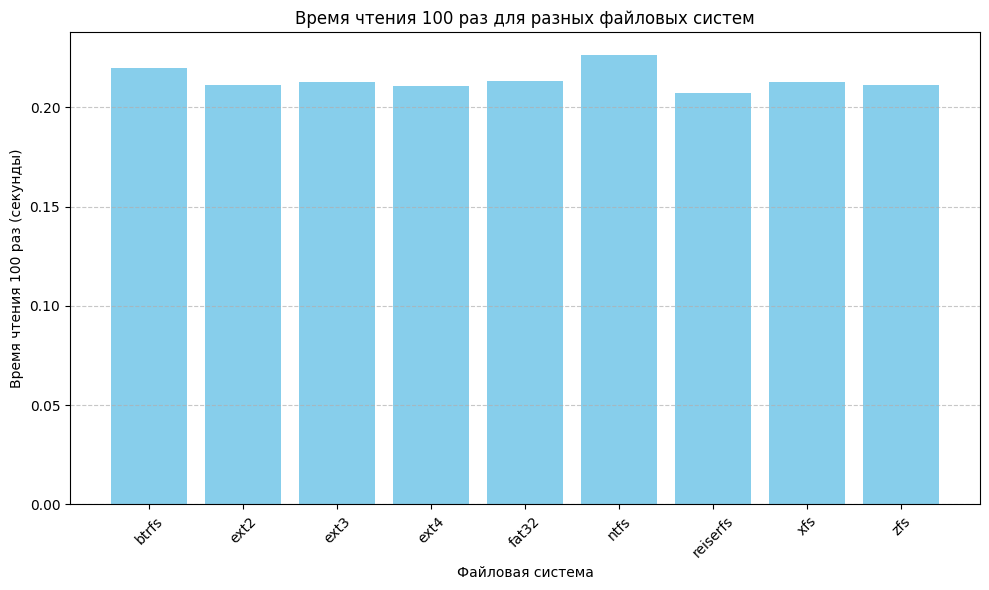

In [2]:
# Подключаем matplotlib для отображения графиков прямо в ноутбуке
%matplotlib inline
import re
import matplotlib.pyplot as plt

# Пример данных из вашего лога (можно заменить на чтение из файла)
log_data = """
Шаг15: Время чтения 100 раз для /mnt/ext2: 0.211437716 секунд
Шаг15: Время чтения 100 раз для /mnt/ext3: 0.212518345 секунд
Шаг15: Время чтения 100 раз для /mnt/ext4: 0.210519835 секунд
Шаг15: Время чтения 100 раз для /mnt/xfs: 0.212930673 секунд
Шаг15: Время чтения 100 раз для /mnt/btrfs: 0.219956943 секунд
Шаг15: Время чтения 100 раз для /mnt/zfs: 0.211293036 секунд
Шаг15: Время чтения 100 раз для /mnt/reiserfs: 0.207319939 секунд
Шаг15: Время чтения 100 раз для /mnt/fat32: 0.213182841 секунд
Шаг15: Время чтения 100 раз для /mnt/ntfs: 0.226434556 секунд
"""

# Парсим данные из лога
pattern = re.compile(r'Шаг15: Время чтения 100 раз для /mnt/(\w+): ([0-9.]+) секунд')
times = {}
for line in log_data.strip().split('\n'):
    match = pattern.search(line)
    if match:
        fs = match.group(1)
        time = float(match.group(2))
        times[fs] = time

# Сортируем для удобства отображения
fs_names = sorted(times.keys())
fs_times = [times[fs] for fs in fs_names]

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(fs_names, fs_times, color='skyblue')
plt.xlabel('Файловая система')
plt.ylabel('Время чтения 100 раз (секунды)')
plt.title('Время чтения 100 раз для разных файловых систем')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


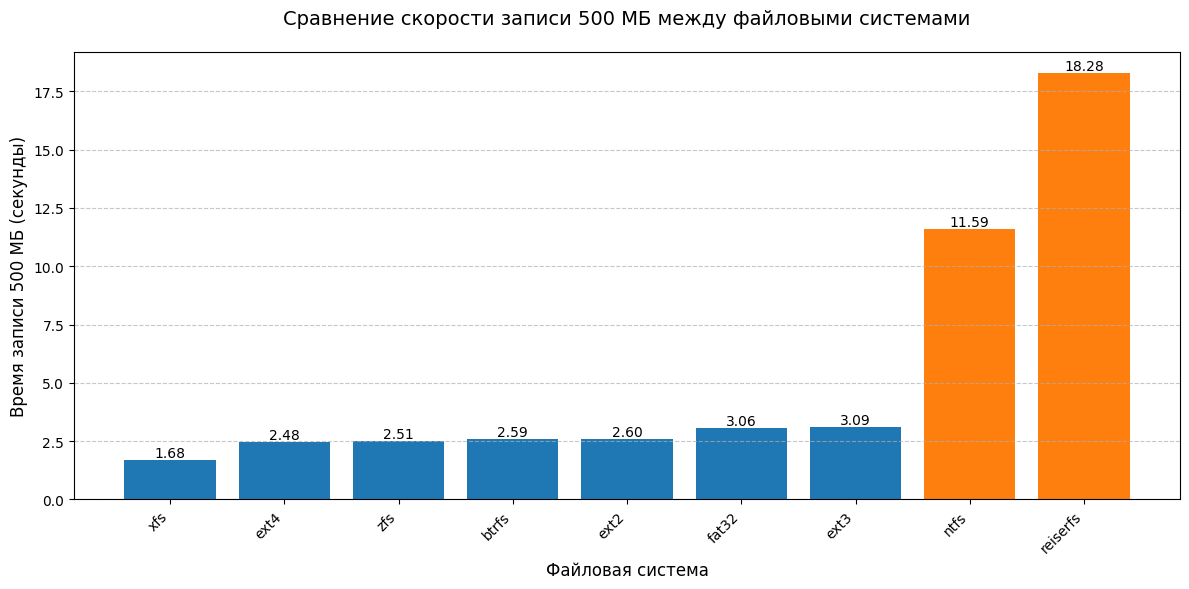

In [3]:
%matplotlib inline
import re
import matplotlib.pyplot as plt

# Пример данных из вашего лога
log_data = """
Шаг16: Время последовательной записи 500 Мб на /mnt/ext2: 2.595074794 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/ext3: 3.093639995 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/ext4: 2.484476616 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/xfs: 1.683783160 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/btrfs: 2.587081145 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/zfs: 2.514645109 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/reiserfs: 18.275327761 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/fat32: 3.056239671 секунд
Шаг16: Время последовательной записи 500 Мб на /mnt/ntfs: 11.586481324 секунд
"""

# Парсим данные
pattern = re.compile(r'Шаг16: Время последовательной записи 500 Мб на /mnt/(\w+): ([0-9.]+) секунд')
times = {}
for line in log_data.strip().split('\n'):
    match = pattern.search(line)
    if match:
        fs = match.group(1)
        time = float(match.group(2))
        times[fs] = time

# Сортируем и визуализируем
fs_names = sorted(times.keys(), key=lambda x: times[x])  # Сортировка по времени
fs_times = [times[fs] for fs in fs_names]

plt.figure(figsize=(12, 6))
bars = plt.bar(fs_names, fs_times, color=['#1f77b4' if t < 10 else '#ff7f0e' for t in fs_times])
plt.xlabel('Файловая система', fontsize=12)
plt.ylabel('Время записи 500 МБ (секунды)', fontsize=12)
plt.title('Сравнение скорости записи 500 МБ между файловыми системами', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


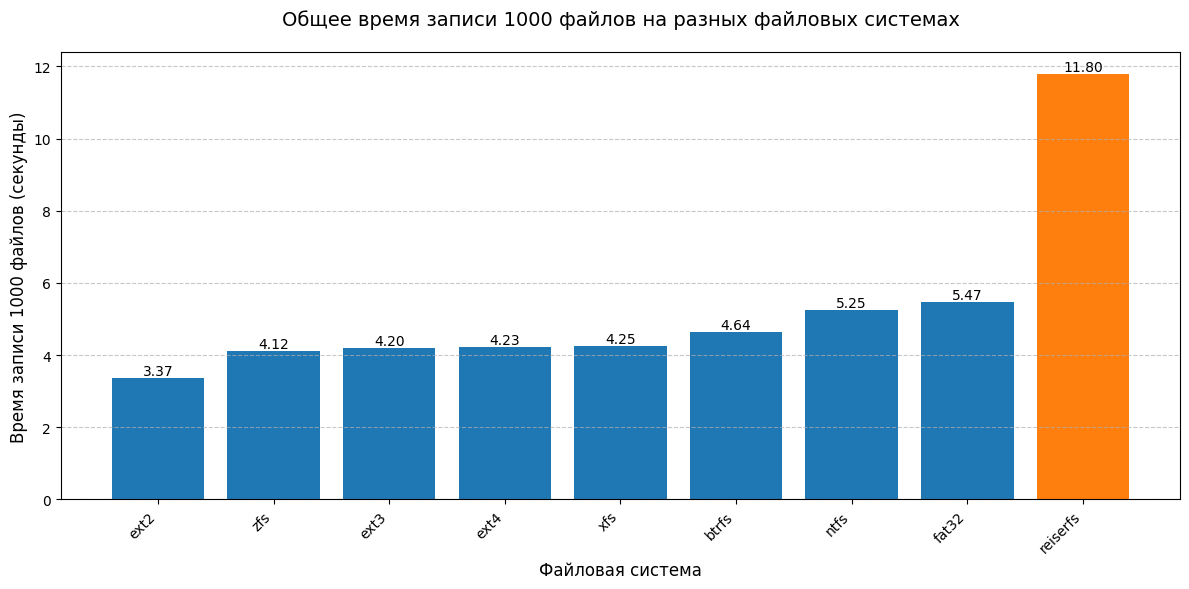

In [5]:
%matplotlib inline
import re
import matplotlib.pyplot as plt

# Пример данных шага 17
log_data = """
Шаг17: Общее время записи 1000 файлов в /mnt/ext2: 3.368117121 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/ext3: 4.202304476 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/ext4: 4.229960443 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/xfs: 4.248050513 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/btrfs: 4.635441535 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/zfs: 4.124515784 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/reiserfs: 11.797354885 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/fat32: 5.467851021 секунд
Шаг17: Общее время записи 1000 файлов в /mnt/ntfs: 5.250404105 секунд
"""

# Регулярное выражение для парсинга
pattern = re.compile(r'Шаг17: Общее время записи 1000 файлов в /mnt/(\w+): ([0-9.]+) секунд')

times = {}
for line in log_data.strip().split('\n'):
    match = pattern.search(line)
    if match:
        fs = match.group(1)
        time = float(match.group(2))
        times[fs] = time

# Сортируем по времени записи
fs_names = sorted(times.keys(), key=lambda x: times[x])
fs_times = [times[fs] for fs in fs_names]

# Цвета: синий для быстрых (<7 сек), оранжевый для медленных
colors = ['#1f77b4' if t < 7 else '#ff7f0e' for t in fs_times]

plt.figure(figsize=(12, 6))
bars = plt.bar(fs_names, fs_times, color=colors)

plt.xlabel('Файловая система', fontsize=12)
plt.ylabel('Время записи 1000 файлов (секунды)', fontsize=12)
plt.title('Общее время записи 1000 файлов на разных файловых системах', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


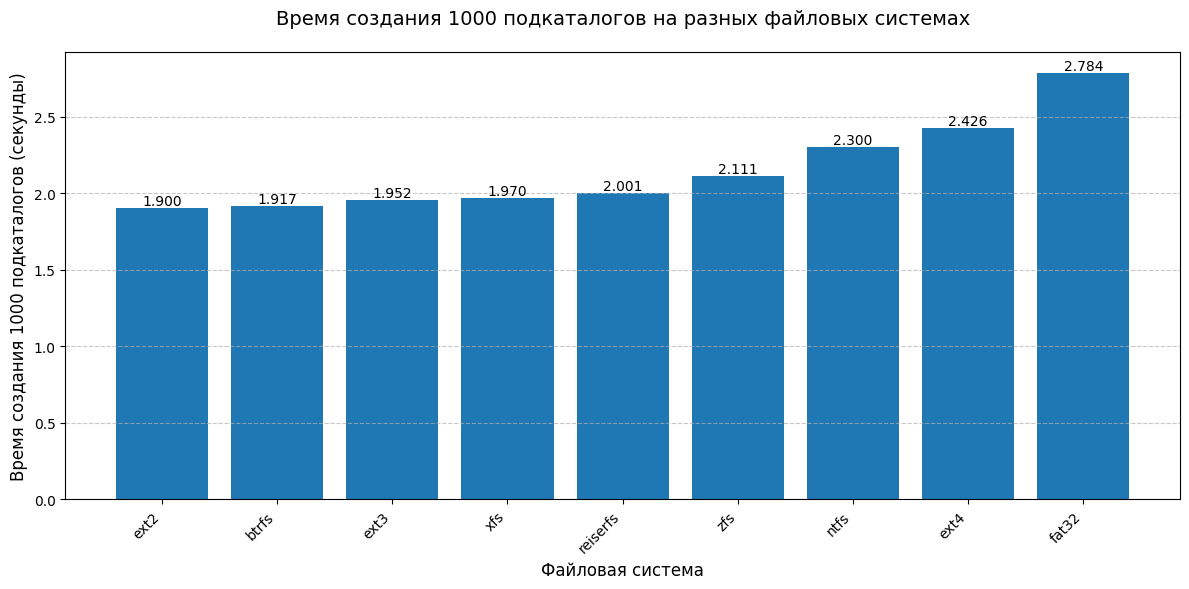

In [6]:
%matplotlib inline
import re
import matplotlib.pyplot as plt

# Пример данных шага 19
log_data = """
Шаг19: Время создания 1000 подкаталогов в /mnt/ext2: 1.900229284 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/ext3: 1.952357547 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/ext4: 2.425826499 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/xfs: 1.970264395 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/btrfs: 1.916782938 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/zfs: 2.110520517 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/reiserfs: 2.000605782 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/fat32: 2.783734632 секунд
Шаг19: Время создания 1000 подкаталогов в /mnt/ntfs: 2.300141789 секунд
"""

# Регулярное выражение для парсинга
pattern = re.compile(r'Шаг19: Время создания 1000 подкаталогов в /mnt/(\w+): ([0-9.]+) секунд')

times = {}
for line in log_data.strip().split('\n'):
    match = pattern.search(line)
    if match:
        fs = match.group(1)
        time = float(match.group(2))
        times[fs] = time

# Сортируем по времени создания
fs_names = sorted(times.keys(), key=lambda x: times[x])
fs_times = [times[fs] for fs in fs_names]

# Цвета - синий для всех, можно добавить выделение, если нужно
colors = ['#1f77b4' for _ in fs_times]

plt.figure(figsize=(12, 6))
bars = plt.bar(fs_names, fs_times, color=colors)

plt.xlabel('Файловая система', fontsize=12)
plt.ylabel('Время создания 1000 подкаталогов (секунды)', fontsize=12)
plt.title('Время создания 1000 подкаталогов на разных файловых системах', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


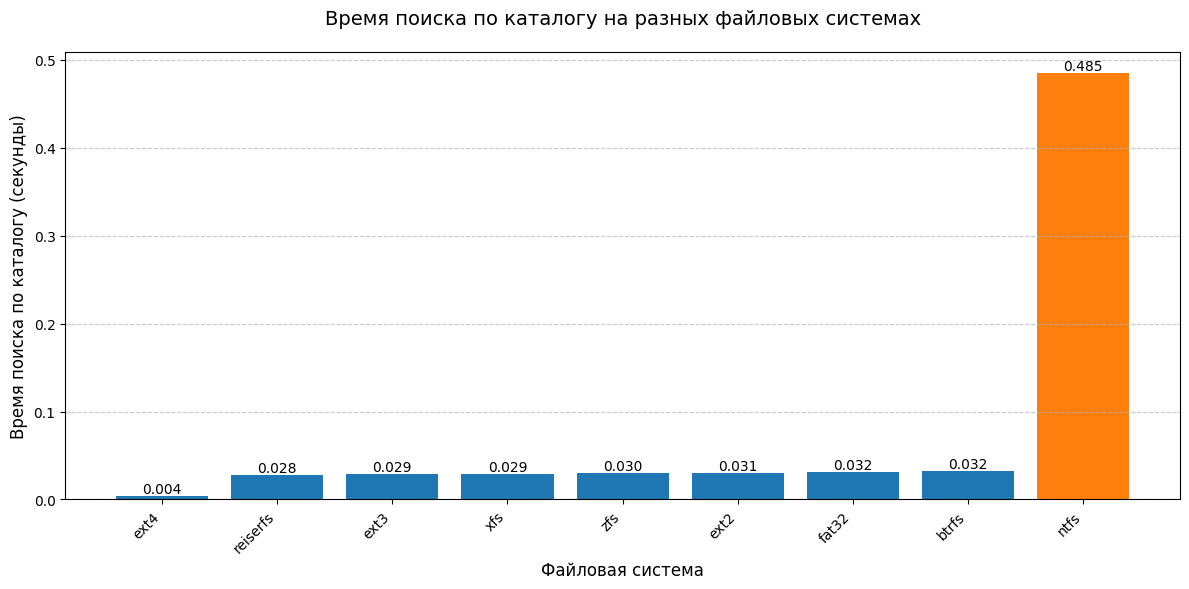

In [7]:
%matplotlib inline
import re
import matplotlib.pyplot as plt

# Данные шага 20
log_data = """
Шаг20: Время поиска по каталогу в /mnt/ext2: 0.030678057 секунд
Шаг20: Время поиска по каталогу в /mnt/ext3: 0.028528940 секунд
Шаг20: Время поиска по каталогу в /mnt/ext4: 0.004389838 секунд
Шаг20: Время поиска по каталогу в /mnt/xfs: 0.029337545 секунд
Шаг20: Время поиска по каталогу в /mnt/btrfs: 0.032354222 секунд
Шаг20: Время поиска по каталогу в /mnt/zfs: 0.030010588 секунд
Шаг20: Время поиска по каталогу в /mnt/reiserfs: 0.027602789 секунд
Шаг20: Время поиска по каталогу в /mnt/fat32: 0.031555734 секунд
Шаг20: Время поиска по каталогу в /mnt/ntfs: 0.484934327 секунд
"""

# Регулярное выражение для парсинга
pattern = re.compile(r'Шаг20: Время поиска по каталогу в /mnt/(\w+): ([0-9.]+) секунд')

times = {}
for line in log_data.strip().split('\n'):
    match = pattern.search(line)
    if match:
        fs = match.group(1)
        time = float(match.group(2))
        times[fs] = time

# Сортируем по времени поиска
fs_names = sorted(times.keys(), key=lambda x: times[x])
fs_times = [times[fs] for fs in fs_names]

# Цвета: синий для быстрых (<0.1 сек), оранжевый для медленного NTFS
colors = ['#1f77b4' if t < 0.1 else '#ff7f0e' for t in fs_times]

plt.figure(figsize=(12, 6))
bars = plt.bar(fs_names, fs_times, color=colors)

plt.xlabel('Файловая система', fontsize=12)
plt.ylabel('Время поиска по каталогу (секунды)', fontsize=12)
plt.title('Время поиска по каталогу на разных файловых системах', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')

# Подписи значений над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


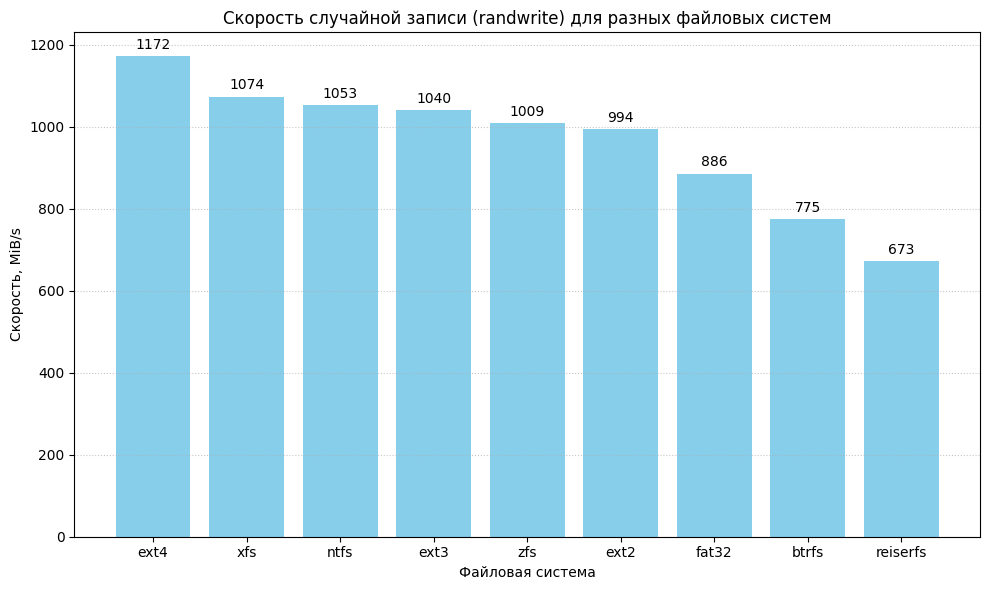

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Данные из всех таблиц
data = [
    ["ext2", 994],
    ["ext3", 1040],

    ["xfs", 1074],
    ["zfs", 1009],
    ["reiserfs", 673],
    ["fat32", 886],
    ["ntfs", 1053],
    ["btrfs", 775],  # Новое значение для btrfs
    ["ext4", 1172],  # Новое значение для ext4
]

# Оставляем только последние значения для файловых систем, если есть новые результаты
df = pd.DataFrame(data, columns=["Файловая система", "Скорость MiB/s"])
df = df.dropna(subset=["Скорость MiB/s"])
df = df.drop_duplicates(subset=["Файловая система"], keep="last")
df = df.sort_values("Скорость MiB/s", ascending=False)

# Строим график
plt.figure(figsize=(10,6))
bars = plt.bar(df["Файловая система"], df["Скорость MiB/s"], color="skyblue")
plt.title("Скорость случайной записи (randwrite) для разных файловых систем")
plt.xlabel("Файловая система")
plt.ylabel("Скорость, MiB/s")
plt.grid(axis="y", linestyle=":", alpha=0.7)

# Подписи на столбцах
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f"{int(height)}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
